In [30]:
# ===========================================
# 0. ライブラリ & データ読み込み
# ===========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

TARGET_PLAYER = "Kaoru YAMAWAKI"

DYNAMIC_PATH = f"/workspace/data/{TARGET_PLAYER}/{TARGET_PLAYER}_dynamic.parquet"
STATIC_LABEL_PATH = f"/workspace/data/{TARGET_PLAYER}/{TARGET_PLAYER}_static_labels.parquet"

df_dyn = pd.read_parquet(DYNAMIC_PATH)
df_label = pd.read_parquet(STATIC_LABEL_PATH)

print("✅ Loaded dynamic features:", df_dyn.shape)
print("✅ Loaded static labels    :", df_label.shape)

# 上位5行を確認
display(df_dyn.head())
display(df_label.head())


✅ Loaded dynamic features: (623, 12)
✅ Loaded static labels    : (623, 43)


,athlete_name,date_,total_distance,total_player_load,max_vel,mean_heart_rate,max_heart_rate,heart_rate_band2_total_duration,heart_rate_band3_total_duration,velocity_band4_total_distance,velocity_band5_total_distance,velocity_band6_total_distance
0,Kaoru YAMAWAKI,2023-01-12,7601.84152,909.58697,28.49351,155.842712,195.0,1417.40001,2171.00004,291.52,494.92999,295.72001
1,Kaoru YAMAWAKI,2023-01-13,6962.62402,749.72084,30.56668,158.254888,189.0,45.90000,1741.00000,130.90,79.77000,238.53000
2,Kaoru YAMAWAKI,2023-01-14,9154.79894,1057.41031,31.08442,142.445105,192.0,1154.80002,2342.79998,289.56,99.93000,143.83000
3,Kaoru YAMAWAKI,2023-01-16,10961.83075,1083.33823,27.34162,124.967800,184.0,1981.49998,1600.30001,1943.47,1210.29006,302.02999
4,Kaoru YAMAWAKI,2023-01-17,6640.39460,707.63383,26.67819,82.781118,138.0,3020.09995,127.40000,323.88,169.95000,61.56000


,date_,session_duration_sec,total_duration,min_heart_rate,velocity_band1_total_distance,velocity_band2_total_distance,velocity_band3_total_distance,gen2_velocity_band1_total_effort_count,gen2_velocity_band2_total_effort_count,gen2_velocity_band3_total_effort_count,...,metabolic_power_band3_total_distance,metabolic_power_band4_total_distance,metabolic_power_band5_total_distance,metabolic_power_band6_total_distance,z_score,z_anomaly,iso_pred,iso_score,iso_anomaly,cluster
0,2023-01-12,8089.00,8089.00,88.0,2586.79001,3637.67002,292.55000,0.0,102.0,46,...,668.63001,276.87000,194.40,146.68000,6.402897,1,1,0.032333,0,NaN
1,2023-01-13,4952.00,4952.00,0.0,2680.89000,3394.86994,437.28000,0.0,265.0,59,...,793.81002,251.52000,188.65,108.45000,3.376391,1,1,0.111313,0,NaN
2,2023-01-14,6672.00,6672.00,0.0,3486.83996,4187.44994,945.23001,0.0,360.0,93,...,1173.20998,285.72999,229.46,124.90000,2.499565,0,1,0.014959,0,NaN
3,2023-01-16,6900.64,6900.64,0.0,3825.88004,2508.10999,1168.98001,0.0,179.0,117,...,2939.21002,454.76000,295.93,279.95999,5.980217,1,1,0.050255,0,NaN
4,2023-01-17,5169.66,5169.66,0.0,2269.78005,3161.34000,652.08000,0.0,252.0,78,...,809.53000,280.79000,227.35,116.22000,1.756715,0,1,0.134306,0,NaN


In [31]:
print("🔍 動的特徴量の列一覧:")
for col in df_dyn.columns:
    print("-", col)


🔍 動的特徴量の列一覧:
- athlete_name
- date_
- total_distance
- total_player_load
- max_vel
- mean_heart_rate
- max_heart_rate
- heart_rate_band2_total_duration
- heart_rate_band3_total_duration
- velocity_band4_total_distance
- velocity_band5_total_distance
- velocity_band6_total_distance


In [32]:
print("\n🔍 静的ラベルの列一覧:")
for col in df_label.columns:
    print("-", col)



🔍 静的ラベルの列一覧:
- date_
- session_duration_sec
- total_duration
- min_heart_rate
- velocity_band1_total_distance
- velocity_band2_total_distance
- velocity_band3_total_distance
- gen2_velocity_band1_total_effort_count
- gen2_velocity_band2_total_effort_count
- gen2_velocity_band3_total_effort_count
- gen2_velocity_band4_total_effort_count
- gen2_velocity_band5_total_effort_count
- gen2_velocity_band6_total_effort_count
- velocity2_band6_total_distance
- velocity2_band7_total_distance
- velocity2_band8_total_distance
- gen2_velocity2_band6_total_effort_count
- gen2_velocity2_band7_total_effort_count
- gen2_acceleration_band2plus_total_effort_count
- gen2_acceleration_band3plus_total_effort_count
- gen2_acceleration_band6plus_total_effort_count
- gen2_acceleration_band7plus_total_effort_count
- total_jumps
- ima_band2_accel_count
- ima_band2_decel_count
- ima_band2_left_count
- ima_band2_right_count
- ima_band2_jump_count
- ima_band3_accel_count
- ima_band3_decel_count
- ima_band3_left_cou

In [33]:
print("\n🔍 日付一致確認:")

# 共通範囲
common_dates = set(df_dyn["date_"]).intersection(set(df_label["date_"]))
print("共通日数:", len(common_dates))

# 完全一致しているか確認
if len(common_dates) == len(df_dyn) == len(df_label):
    print("➡️  OK: dynamic と static の日付は完全一致しています。")
else:
    print("⚠️ 日付に差があります。以下確認してください：")
    print("dynamic 日数:", len(df_dyn))
    print("static  日数:", len(df_label))



🔍 日付一致確認:
共通日数: 623
➡️  OK: dynamic と static の日付は完全一致しています。


In [34]:
print("\n🔍 dynamic 欠損値チェック:")
print(df_dyn.isna().sum())



🔍 dynamic 欠損値チェック:
athlete_name                       0
date_                              0
total_distance                     0
total_player_load                  0
max_vel                            0
mean_heart_rate                    0
max_heart_rate                     0
heart_rate_band2_total_duration    0
heart_rate_band3_total_duration    0
velocity_band4_total_distance      0
velocity_band5_total_distance      0
velocity_band6_total_distance      0
dtype: int64


In [35]:
df_dyn.describe().T


,count,mean,min,25%,50%,75%,max,std
date_,623,2024-04-11 20:27:21.091492608,2023-01-12 00:00:00,2023-08-06 00:00:00,2024-04-06 00:00:00,2024-11-15 12:00:00,2025-10-05 00:00:00,NaN
total_distance,623.0,6215.419234,203.51878,4030.67785,5389.24481,7709.562315,23747.64563,3115.66025
total_player_load,623.0,660.121665,20.8843,439.72785,588.07281,838.223615,2382.35165,309.187794
max_vel,623.0,29.714465,9.67321,26.9254,29.42643,31.83803,301.86021,11.635704
mean_heart_rate,623.0,71.914187,0.0,0.0,94.71541,119.860622,184.54126,59.685272
max_heart_rate,623.0,104.842697,0.0,0.0,151.0,179.0,199.0,83.994359
heart_rate_band2_total_duration,623.0,1091.529373,0.0,0.0,522.99999,1933.350005,5929.19996,1353.298941
heart_rate_band3_total_duration,623.0,636.779454,0.0,0.0,261.10001,1133.699975,4875.29996,778.642639
velocity_band4_total_distance,623.0,222.884863,0.0,77.635,160.29,305.324995,2248.15992,215.308379
velocity_band5_total_distance,623.0,282.718668,0.0,96.79,196.05,383.815,1636.18005,261.725785


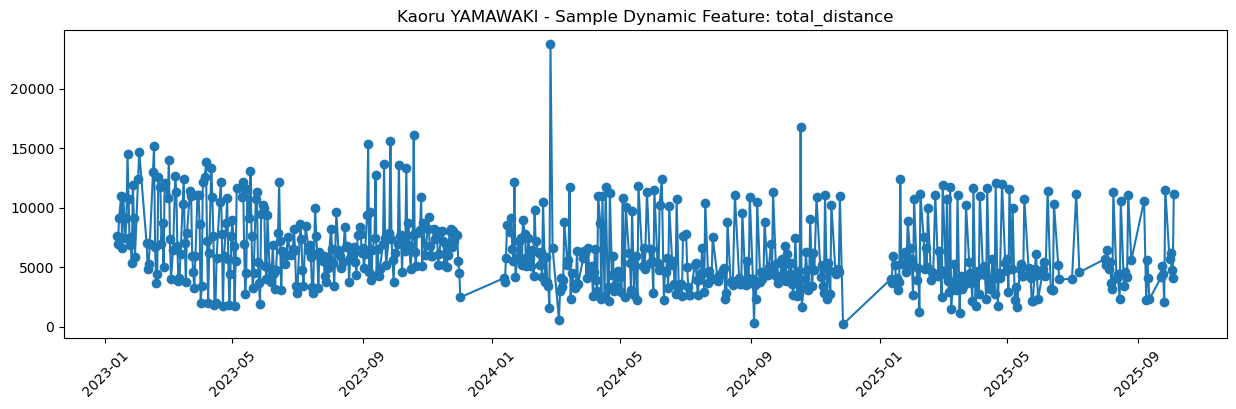

In [36]:
sample_col = df_dyn.columns[2]  # 例：最初の動的変数を可視化
plt.figure(figsize=(15,4))
plt.plot(df_dyn["date_"], df_dyn[sample_col], marker="o")
plt.title(f"{TARGET_PLAYER} - Sample Dynamic Feature: {sample_col}")
plt.xticks(rotation=45)
plt.show()


In [37]:
# ===========================================
# 1. 前処理：日付で結合してソート
# ===========================================
# athlete_name は不要なので落とす
df_dyn2 = df_dyn.drop(columns=["athlete_name"])

# ラベルと日付で結合
df_all = pd.merge(df_dyn2, df_label, on="date_", how="inner")

# 日付でソート
df_all = df_all.sort_values("date_").reset_index(drop=True)

print("✅ 結合後:", df_all.shape)
display(df_all.head())

# -----------------------------
# 特徴量列とラベル列を分離
# -----------------------------
feature_cols = [c for c in df_dyn2.columns if c != "date_"]
label_cols = ["iso_anomaly", "cluster"]  # 必要に応じて増やせる

X_raw = df_all[feature_cols].astype(float).values
dates = df_all["date_"].values
static_anomaly = df_all["iso_anomaly"].fillna(0).values.astype(int)

print("特徴量次元:", X_raw.shape)
print("日数:", len(dates))

# -----------------------------
# スケーリング（StandardScaler 相当）
# -----------------------------
from sklearn.preprocessing import StandardScaler

scaler_dyn = StandardScaler()
X_scaled = scaler_dyn.fit_transform(X_raw)

print("✅ スケーリング完了")


✅ 結合後: (623, 53)


,date_,total_distance,total_player_load,max_vel,mean_heart_rate,max_heart_rate,heart_rate_band2_total_duration,heart_rate_band3_total_duration,velocity_band4_total_distance,velocity_band5_total_distance,...,metabolic_power_band3_total_distance,metabolic_power_band4_total_distance,metabolic_power_band5_total_distance,metabolic_power_band6_total_distance,z_score,z_anomaly,iso_pred,iso_score,iso_anomaly,cluster
0,2023-01-12,7601.84152,909.58697,28.49351,155.842712,195.0,1417.40001,2171.00004,291.52,494.92999,...,668.63001,276.87000,194.40,146.68000,6.402897,1,1,0.032333,0,NaN
1,2023-01-13,6962.62402,749.72084,30.56668,158.254888,189.0,45.90000,1741.00000,130.90,79.77000,...,793.81002,251.52000,188.65,108.45000,3.376391,1,1,0.111313,0,NaN
2,2023-01-14,9154.79894,1057.41031,31.08442,142.445105,192.0,1154.80002,2342.79998,289.56,99.93000,...,1173.20998,285.72999,229.46,124.90000,2.499565,0,1,0.014959,0,NaN
3,2023-01-16,10961.83075,1083.33823,27.34162,124.967800,184.0,1981.49998,1600.30001,1943.47,1210.29006,...,2939.21002,454.76000,295.93,279.95999,5.980217,1,1,0.050255,0,NaN
4,2023-01-17,6640.39460,707.63383,26.67819,82.781118,138.0,3020.09995,127.40000,323.88,169.95000,...,809.53000,280.79000,227.35,116.22000,1.756715,0,1,0.134306,0,NaN


特徴量次元: (623, 10)
日数: 623
✅ スケーリング完了


In [38]:
# ===========================================
# 2. シーケンス作成（過去SEQ_LEN日）
# ===========================================
SEQ_LEN = 30  # 窓サイズ

seq_list = []
date_list = []
label_lastday = []        # その窓の最終日の静的異常ラベル
label_any_in_window = []  # 窓内に1日でも静的異常があったか

N = len(df_all)

for i in range(N - SEQ_LEN + 1):
    x_window = X_scaled[i:i+SEQ_LEN]               # (SEQ_LEN, features)
    y_last = static_anomaly[i+SEQ_LEN-1]           # 最終日の異常ラベル
    y_any = static_anomaly[i:i+SEQ_LEN].max()      # 窓内に1日でも異常があれば1

    seq_list.append(x_window)
    date_list.append(dates[i+SEQ_LEN-1])           # シーケンスを代表する日付
    label_lastday.append(y_last)
    label_any_in_window.append(y_any)

seq_array = np.stack(seq_list)  # (num_seq, SEQ_LEN, features)

print("✅ シーケンス数:", seq_array.shape[0])
print("シーケンス形状:", seq_array.shape)


✅ シーケンス数: 594
シーケンス形状: (594, 30, 10)


In [39]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader


In [40]:
# ===========================================
# 3. Dataset & DataLoader
# ===========================================
class SequenceDataset(Dataset):
    def __init__(self, sequences):
        self.sequences = sequences

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        x = self.sequences[idx]  # (SEQ_LEN, features)
        return torch.tensor(x, dtype=torch.float32)

# ここではシンプルに「全シーケンス」で学習する
dataset = SequenceDataset(seq_array)

# train / val に分割（時系列なので前半をtrain, 後半をval）
train_ratio = 0.7
train_size = int(len(dataset) * train_ratio)
val_size = len(dataset) - train_size

train_dataset, val_dataset = torch.utils.data.random_split(
    dataset,
    [train_size, val_size],
    generator=torch.Generator().manual_seed(42)
)

BATCH_SIZE = 32

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

print("train size:", len(train_dataset))
print("val   size:", len(val_dataset))


train size: 415
val   size: 179


In [41]:
# ===========================================
# 4. LSTM AutoEncoder モデル定義
# ===========================================
class LSTMAutoEncoder(nn.Module):
    def __init__(self, input_dim, hidden_dim=128, latent_dim=48, num_layers=2, dropout=0.1):
        super().__init__()
        
        # ----- Encoder -----
        self.encoder_lstm = nn.LSTM(
            input_dim, hidden_dim,
            num_layers=num_layers,
            dropout=dropout,
            batch_first=True
        )
        self.encoder_fc = nn.Linear(hidden_dim, latent_dim)

        # ----- Decoder -----
        self.decoder_fc = nn.Linear(latent_dim, hidden_dim)
        self.decoder_lstm = nn.LSTM(
            hidden_dim, input_dim,
            num_layers=num_layers,
            dropout=dropout,
            batch_first=True
        )

    def forward(self, x):
        # (batch, seq_len, input_dim)
        enc_out, _ = self.encoder_lstm(x)
        h_last = enc_out[:, -1, :]          # Encoder の最終隠れ状態
        z = self.encoder_fc(h_last)         # latent vector

        # latent を decoder の入力へ
        dec_input = self.decoder_fc(z).unsqueeze(1)
        dec_input = dec_input.repeat(1, x.size(1), 1)

        dec_out, _ = self.decoder_lstm(dec_input)
        return dec_out


input_dim = X_scaled.shape[1]
model = LSTMAutoEncoder(input_dim=input_dim, hidden_dim=64, latent_dim=32)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

criterion = nn.MSELoss(reduction="mean")
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

print("✅ model initialized on", device)


✅ model initialized on cpu


Epoch   1 | train loss: 0.970284 | val loss: 1.029046
Epoch   2 | train loss: 0.906878 | val loss: 0.948845
Epoch   3 | train loss: 0.845594 | val loss: 0.892815
Epoch   4 | train loss: 0.797353 | val loss: 0.850515
Epoch   5 | train loss: 0.760046 | val loss: 0.816329
Epoch   6 | train loss: 0.737226 | val loss: 0.798775
Epoch   7 | train loss: 0.722606 | val loss: 0.788419
Epoch   8 | train loss: 0.714192 | val loss: 0.780456
Epoch   9 | train loss: 0.704253 | val loss: 0.772399
Epoch  10 | train loss: 0.697828 | val loss: 0.765538
Epoch  11 | train loss: 0.692973 | val loss: 0.768020
Epoch  12 | train loss: 0.691021 | val loss: 0.766023
Epoch  13 | train loss: 0.692052 | val loss: 0.762514
Epoch  14 | train loss: 0.686796 | val loss: 0.760463
Epoch  15 | train loss: 0.685772 | val loss: 0.754944
Epoch  16 | train loss: 0.682041 | val loss: 0.753889
Epoch  17 | train loss: 0.680556 | val loss: 0.753499
Epoch  18 | train loss: 0.679217 | val loss: 0.751167
Epoch  19 | train loss: 0.67

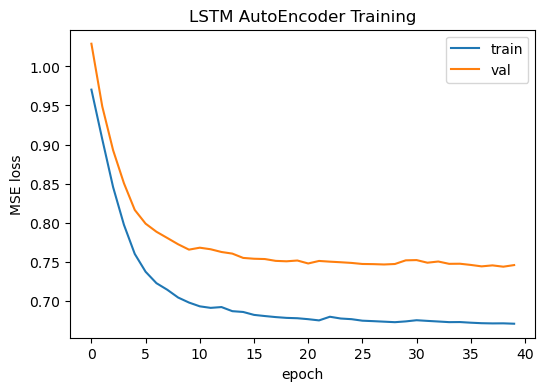

In [42]:
# ===========================================
# 5. 学習ループ
# ===========================================
EPOCHS = 40

def evaluate(loader):
    model.eval()
    total_loss = 0.0
    with torch.no_grad():
        for x in loader:
            x = x.to(device)
            recon = model(x)
            loss = criterion(recon, x)
            total_loss += loss.item() * x.size(0)
    return total_loss / len(loader.dataset)

train_losses = []
val_losses = []

for epoch in range(1, EPOCHS+1):
    model.train()
    epoch_loss = 0.0
    for x in train_loader:
        x = x.to(device)
        optimizer.zero_grad()
        recon = model(x)
        loss = criterion(recon, x)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item() * x.size(0)

    train_loss = epoch_loss / len(train_loader.dataset)
    val_loss = evaluate(val_loader)

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    print(f"Epoch {epoch:3d} | train loss: {train_loss:.6f} | val loss: {val_loss:.6f}")

# 学習曲線の表示
plt.figure(figsize=(6,4))
plt.plot(train_losses, label="train")
plt.plot(val_losses, label="val")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("MSE loss")
plt.title("LSTM AutoEncoder Training")
plt.show()


In [43]:
# ===========================================
# 6. 全シーケンスの再構成誤差を計算
# ===========================================
model.eval()

all_errors = []
with torch.no_grad():
    for i in range(len(seq_array)):
        x = torch.tensor(seq_array[i:i+1], dtype=torch.float32).to(device)  # (1, seq_len, input_dim)
        recon = model(x)
        # シーケンス全体の MSE
        err = ((recon - x) ** 2).mean().item()
        all_errors.append(err)

all_errors = np.array(all_errors)

print("再構成誤差の統計:")
print("mean:", all_errors.mean())
print("std :", all_errors.std())


再構成誤差の統計:
mean: 0.6920218363855825
std : 0.7459098474970842


In [44]:
# ===========================================
# 7. 閾値決定 & 動的異常フラグ
# ===========================================
threshold = all_errors.mean() + 3 * all_errors.std()
print("動的異常閾値:", threshold)

dynamic_anomaly = (all_errors > threshold).astype(int)

# シーケンスは date_list に 1:1 で対応している
df_dyn_anom = pd.DataFrame({
    "date_": date_list,
    "dyn_recon_error": all_errors,
    "dyn_anomaly": dynamic_anomaly,
    "static_anomaly": label_lastday,         # 最終日の静的異常
    "static_any_in_window": label_any_in_window
})

print(df_dyn_anom.head())


動的異常閾値: 2.9297513788768352
       date_  dyn_recon_error  dyn_anomaly  static_anomaly  \
0 2023-02-23         1.460206            0               0   
1 2023-02-24         1.448014            0               0   
2 2023-02-25         1.454301            0               0   
3 2023-02-26         1.480192            0               0   
4 2023-03-01         1.284044            0               0   

   static_any_in_window  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1  


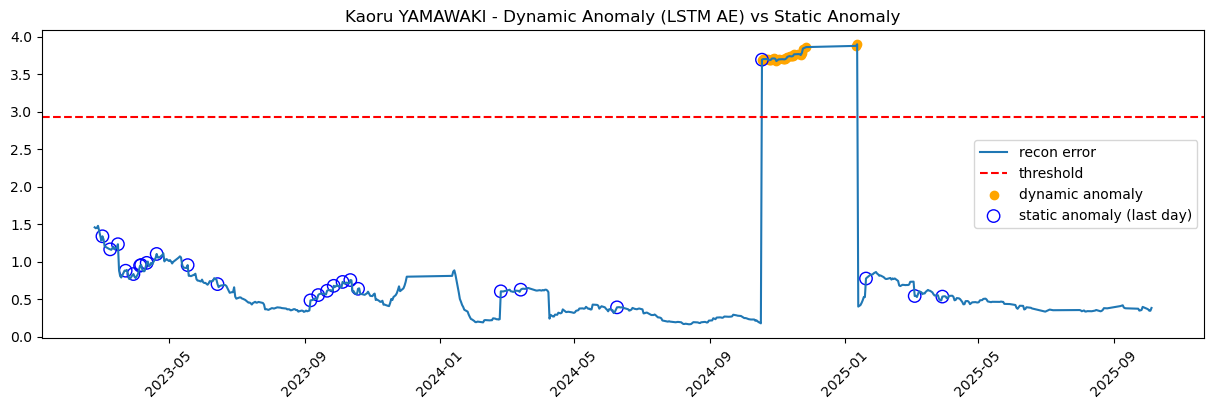

In [45]:
# ===========================================
# 8. 時系列プロット（動的 vs 静的）
# ===========================================
plt.figure(figsize=(15,4))
plt.plot(df_dyn_anom["date_"], df_dyn_anom["dyn_recon_error"], label="recon error")
plt.axhline(threshold, color="red", linestyle="--", label="threshold")

# 動的異常の日をハイライト
mask_dyn = df_dyn_anom["dyn_anomaly"] == 1
plt.scatter(df_dyn_anom["date_"][mask_dyn],
            df_dyn_anom["dyn_recon_error"][mask_dyn],
            color="orange", label="dynamic anomaly")

# 静的異常の日も別マーカーで
mask_static = df_dyn_anom["static_anomaly"] == 1
plt.scatter(df_dyn_anom["date_"][mask_static],
            df_dyn_anom["dyn_recon_error"][mask_static],
            facecolors="none", edgecolors="blue", s=80, label="static anomaly (last day)")

plt.legend()
plt.xticks(rotation=45)
plt.title(f"{TARGET_PLAYER} - Dynamic Anomaly (LSTM AE) vs Static Anomaly")
plt.show()
